**Importing Libraries**

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [166]:
import warnings
warnings.filterwarnings("ignore")

**Exploring training data**

In [29]:
Houses = pd.read_csv('train.csv')
Houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
Houses.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'] , axis='columns', inplace=True) #Dropping columns that has more 50% or more of null values

In [32]:
Houses.dropna(inplace = True)

In [33]:
Houses.info() #checking the data after dropping some columns that mostly have missing values & rows with NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

Even though there are two columns that don't have the right data type "YearBuilt" & "YearRemodAdd" and they are usually sorted as dates, but since each year has different prices falling under them, it can be very difficult to utilize line ploting. Hence, they can be treated as integers & I will use scatter plot to explore the relationship between them and the house price.

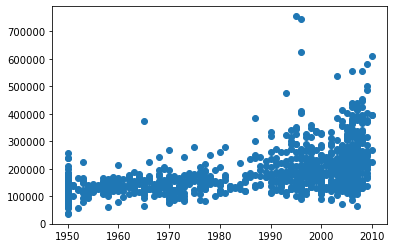

In [34]:
plt.scatter(Houses['YearRemodAdd'], Houses['SalePrice'])

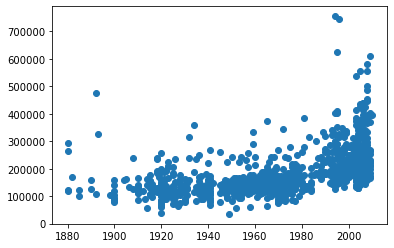

In [35]:
plt.scatter(Houses['YearBuilt'], Houses['SalePrice'])

Filtering all objective type columns and study their relationg ships with house prices

In [36]:
List = []
for i in Houses.columns:
    if Houses[i].dtype == object:
        List.append(i)

In [37]:
for i in range(len(List)):
    print(Houses[List[i]].unique()) #if one of those categorical variables has only one value in it, it will be dropped. For those who has two, or more box plot will be used or bar plot. to explore the relationship with houses' prices

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
['CompShg' 'WdShngl' 'Membran' 'WdShake' 'Tar&Grv' 'Roll' 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'BrkFace' 'HdBoard' 'WdShing' 'CemntBd'
 'Stucco' 'Plywood' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Wd Sdng' 'Plywood' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng

In [38]:
List

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
Houses['Utilities'].unique() #Utilities columns has only one value in it, which mean that it doesn't impact the house price. Hence, can be deleted

array(['AllPub'], dtype=object)

In [40]:
Houses.drop(['Utilities'] , axis='columns', inplace=True)

Now we do box plot foe each categorical variables to check for correlation with house price

In [41]:
import seaborn as sns

In [42]:
List2 = []
for i in Houses.columns:
    if Houses[i].dtype == object:
        List2.append(i)

<ipython-input-43-1bfd682afe5f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


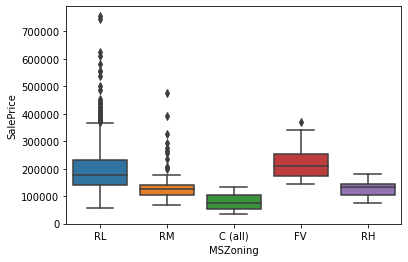

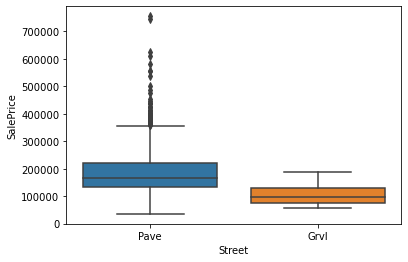

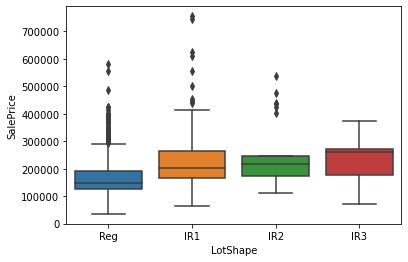

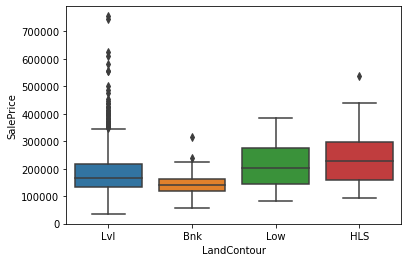

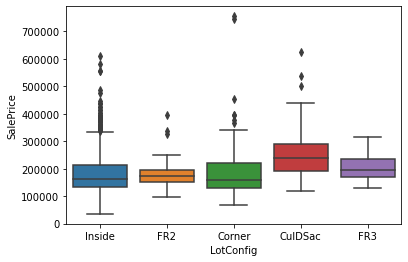

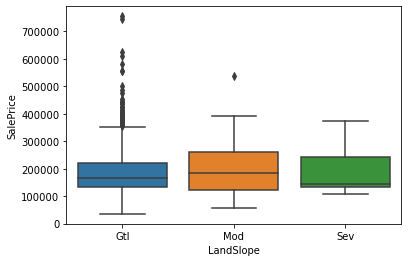

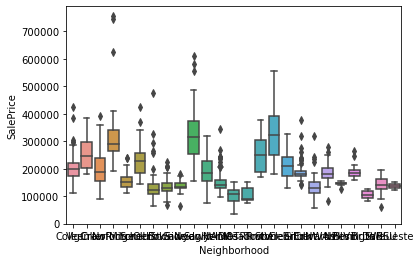

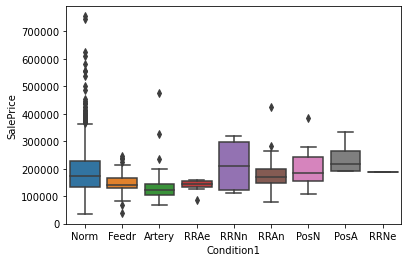

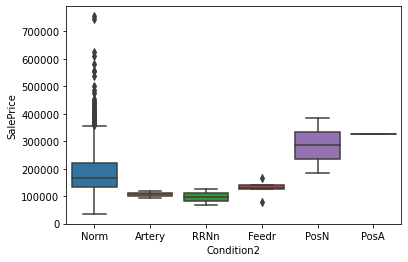

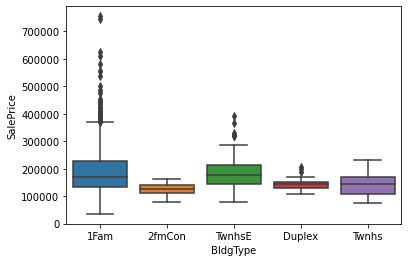

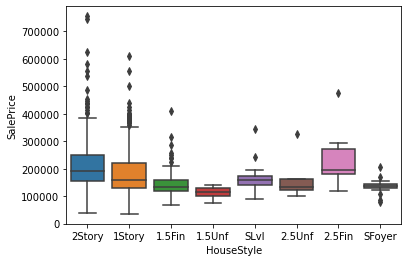

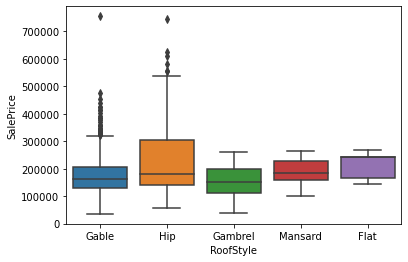

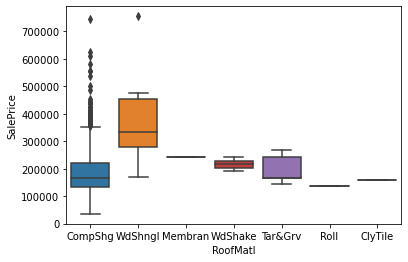

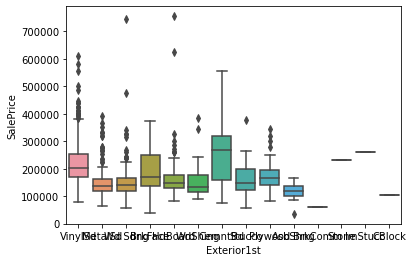

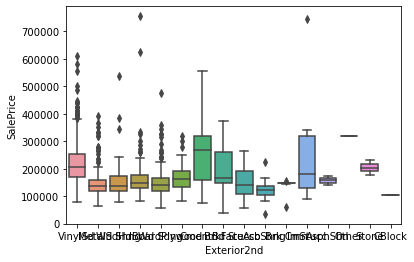

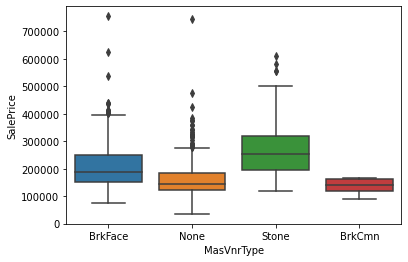

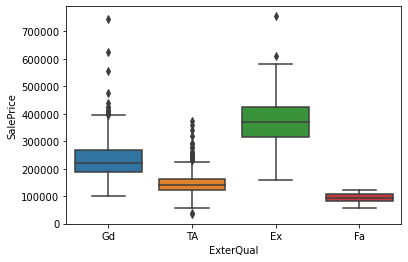

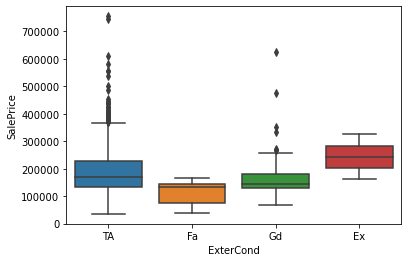

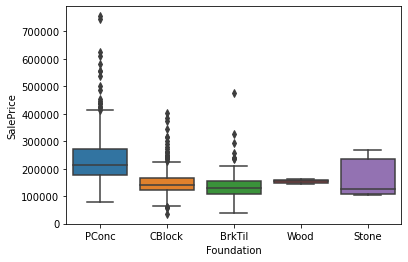

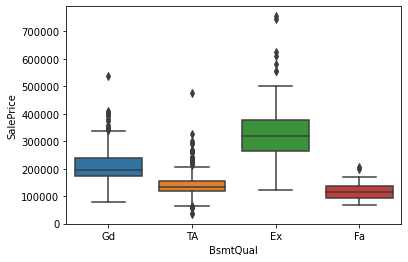

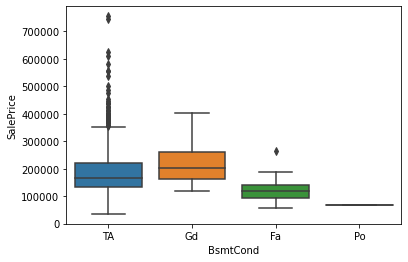

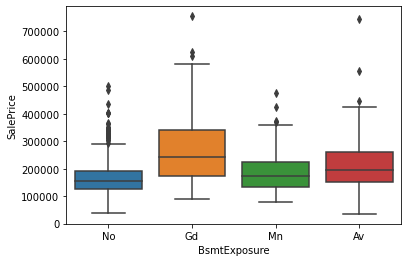

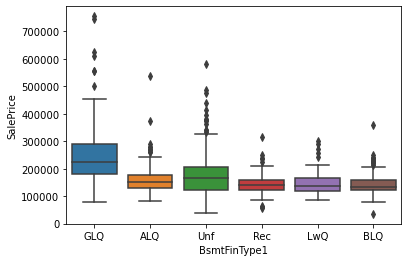

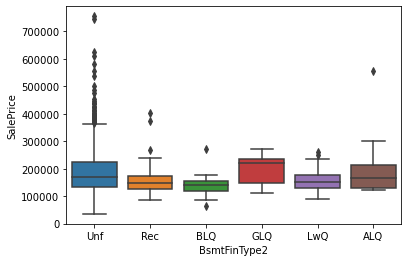

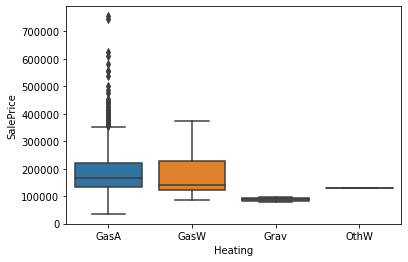

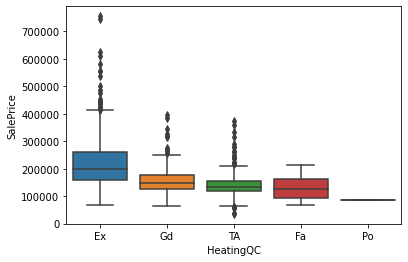

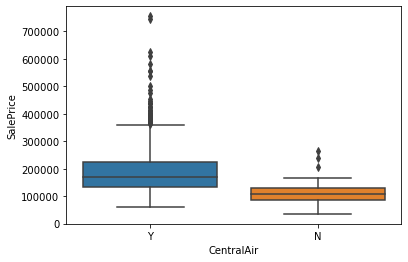

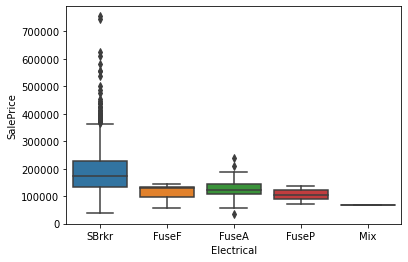

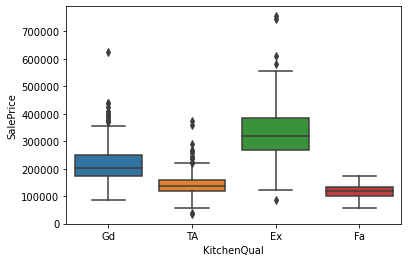

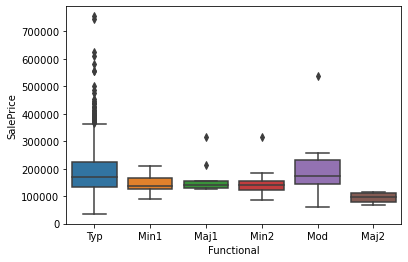

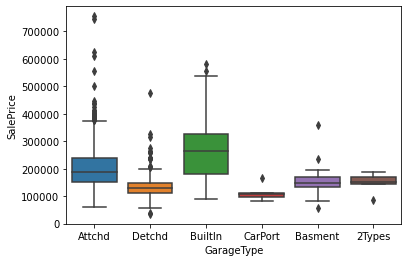

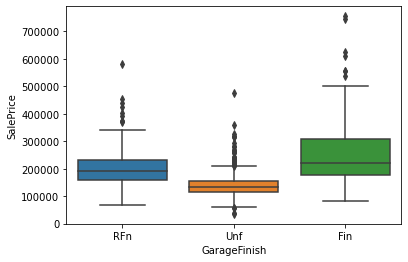

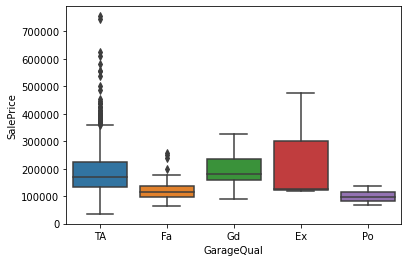

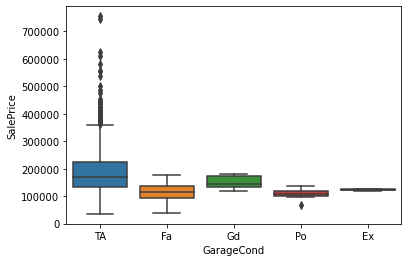

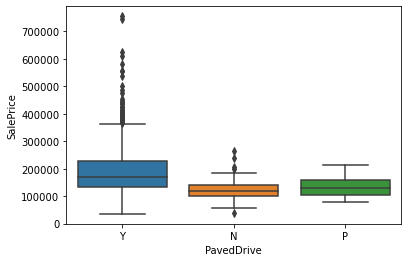

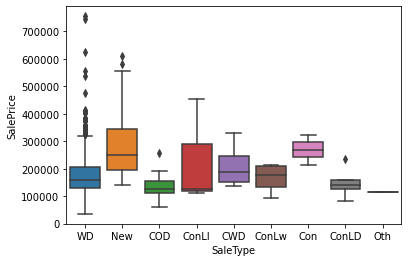

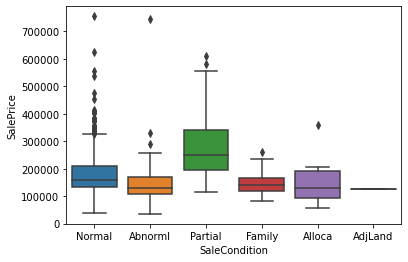

In [43]:
for i in List2:
    plt.figure()
    sns.boxplot(data = Houses, x = Houses[i], y = Houses['SalePrice'])
plt.show()

From the above it can be seen that the following columns don't have a lot of impact over the house prices:<br>
1- LotShape<br>
2- LandContour<br>
3- LandSlope

In [44]:
Houses2 = Houses.copy()

Let us before proceeding further, check the model with only numirical variables being used to predict the house price.<br>
However, before doing this we need to scale all numeric variabls

In [45]:
for i in List2:
    Houses2.drop([i] , axis='columns', inplace=True)

In [48]:
Houses2.drop(['Id'] , axis='columns', inplace=True)

In [49]:
Houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   LotFrontage    1094 non-null   float64
 2   LotArea        1094 non-null   int64  
 3   OverallQual    1094 non-null   int64  
 4   OverallCond    1094 non-null   int64  
 5   YearBuilt      1094 non-null   int64  
 6   YearRemodAdd   1094 non-null   int64  
 7   MasVnrArea     1094 non-null   float64
 8   BsmtFinSF1     1094 non-null   int64  
 9   BsmtFinSF2     1094 non-null   int64  
 10  BsmtUnfSF      1094 non-null   int64  
 11  TotalBsmtSF    1094 non-null   int64  
 12  1stFlrSF       1094 non-null   int64  
 13  2ndFlrSF       1094 non-null   int64  
 14  LowQualFinSF   1094 non-null   int64  
 15  GrLivArea      1094 non-null   int64  
 16  BsmtFullBath   1094 non-null   int64  
 17  BsmtHalfBath   1094 non-null   int64  
 18  FullBath

<ipython-input-50-4b32ee4e9466>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


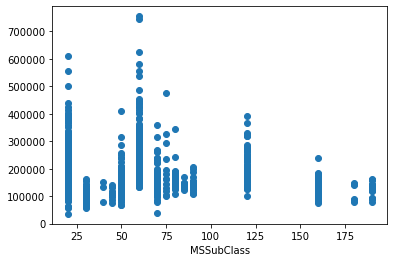

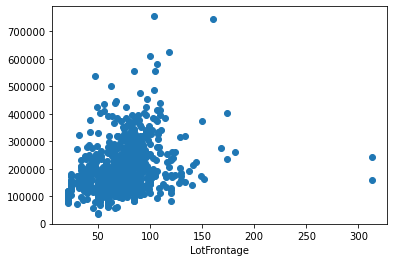

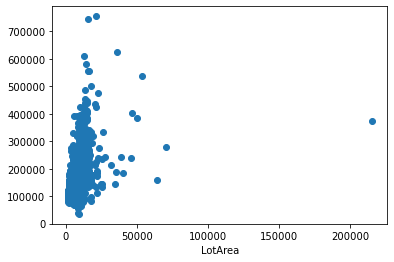

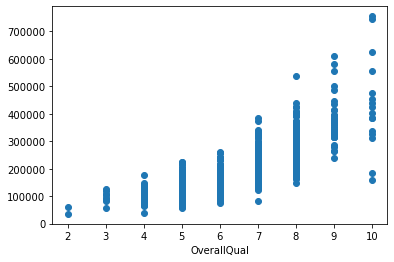

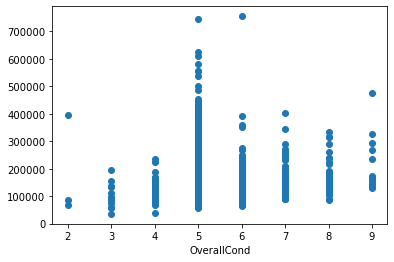

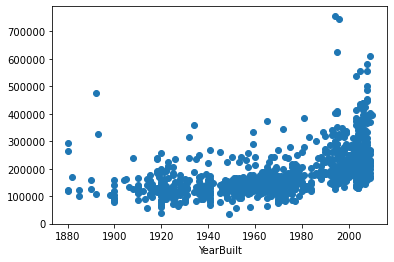

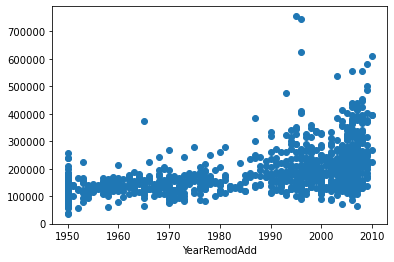

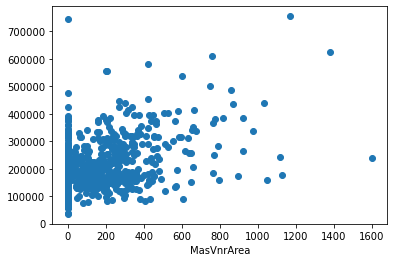

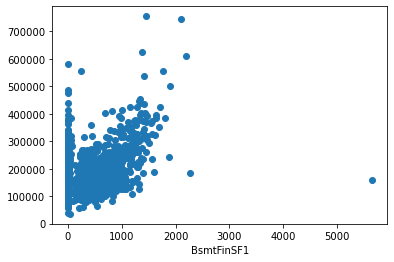

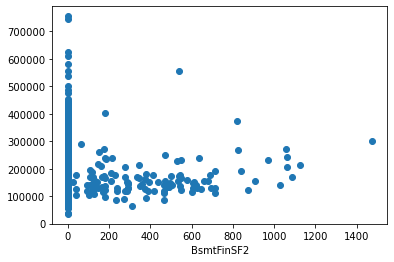

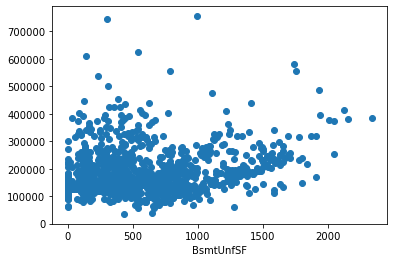

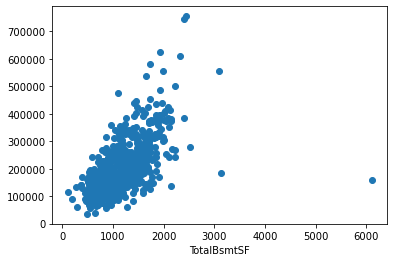

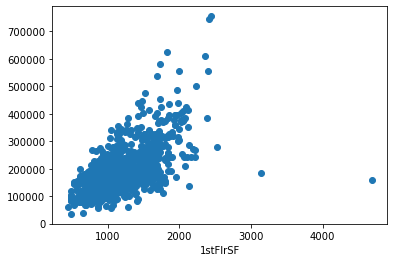

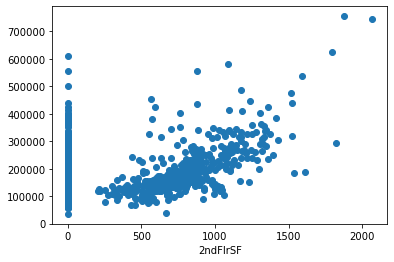

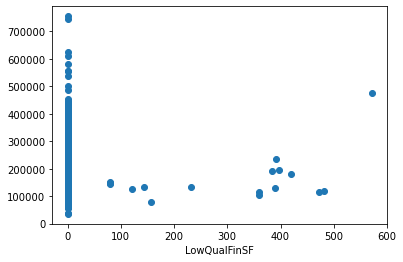

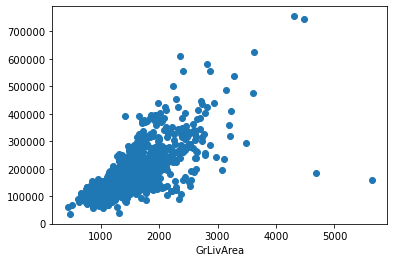

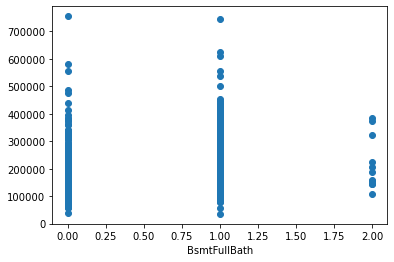

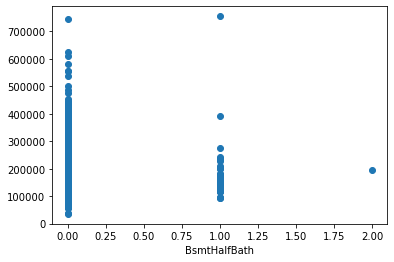

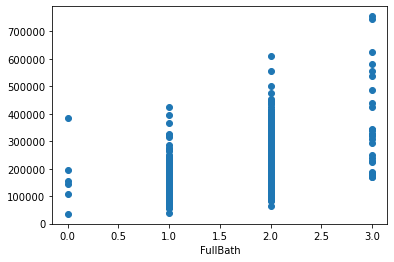

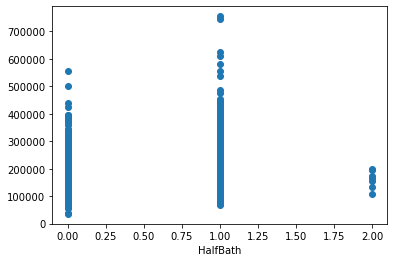

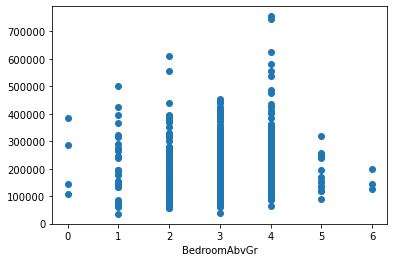

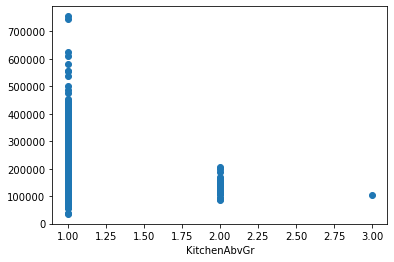

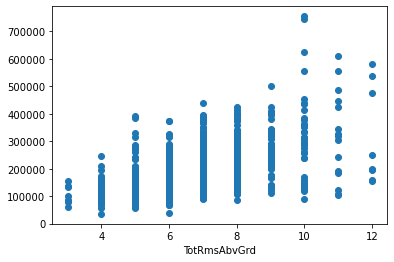

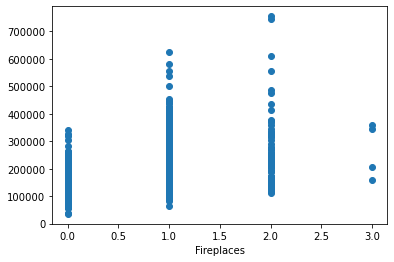

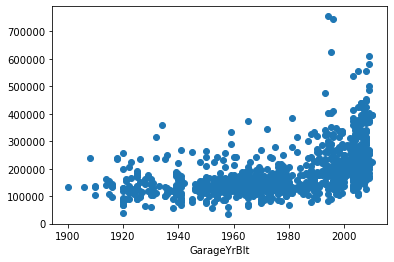

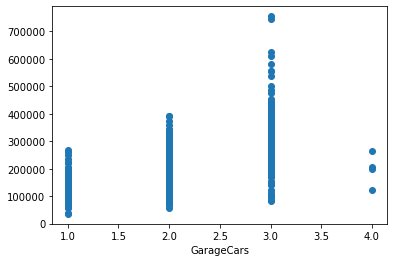

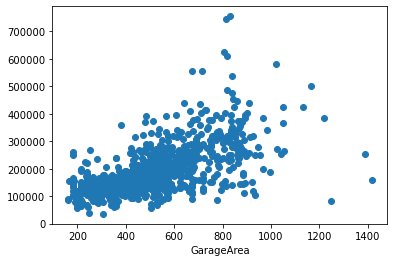

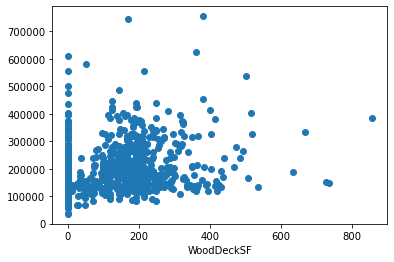

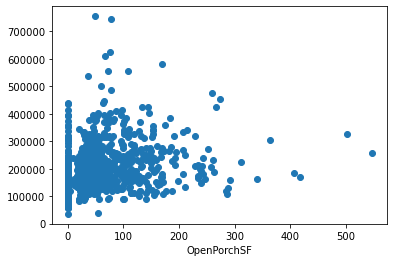

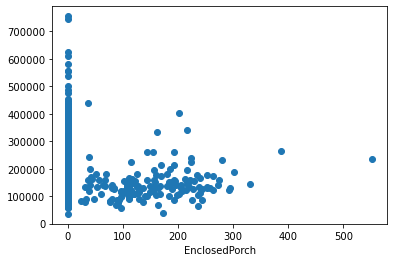

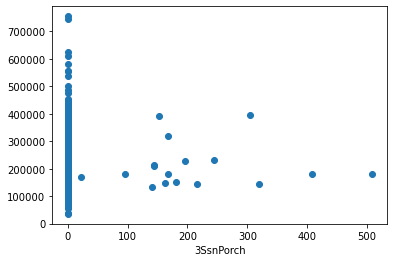

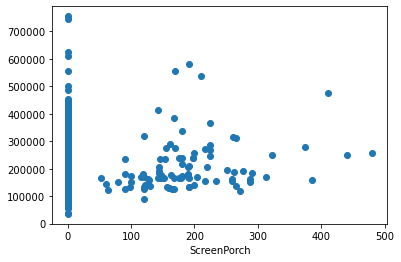

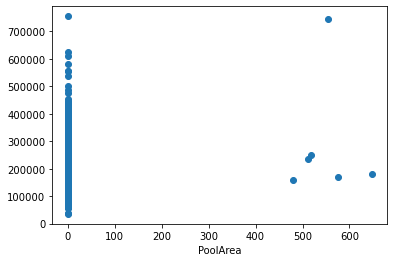

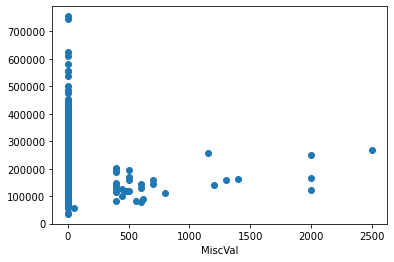

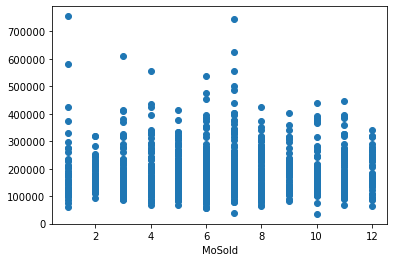

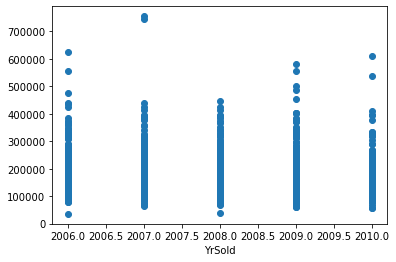

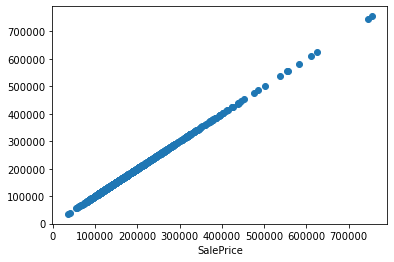

In [50]:
for i in Houses2:
    plt.figure()
    plt.scatter(Houses[i], Houses['SalePrice'])
    plt.xlabel(i)
plt.show()

In [51]:
coef = 0
for i in Houses2:
    coef = np.corrcoef(Houses[i], Houses['SalePrice'])
    if coef[1, 0] > 0.5 or coef[1, 0] < -0.5:
        print('The correlation coefficiant is: ', coef[1,0], 'Between ', i, 'and sales price')

The correlation coefficiant is:  0.7954368169482009 Between  OverallQual and sales price
The correlation coefficiant is:  0.5234338660174467 Between  YearBuilt and sales price
The correlation coefficiant is:  0.5198056666829785 Between  YearRemodAdd and sales price
The correlation coefficiant is:  0.6177408002371753 Between  TotalBsmtSF and sales price
The correlation coefficiant is:  0.6176923632483361 Between  1stFlrSF and sales price
The correlation coefficiant is:  0.7074814244872482 Between  GrLivArea and sales price
The correlation coefficiant is:  0.5782986485388251 Between  FullBath and sales price
The correlation coefficiant is:  0.5605208462915487 Between  TotRmsAbvGrd and sales price
The correlation coefficiant is:  0.5022481064224714 Between  GarageYrBlt and sales price
The correlation coefficiant is:  0.6521029143373122 Between  GarageCars and sales price
The correlation coefficiant is:  0.6207724114772001 Between  GarageArea and sales price
The correlation coefficiant is:

In [52]:
List3 = []
for i in Houses2:
    coef = np.corrcoef(Houses[i], Houses['SalePrice'])
    if 0.5 > coef[1, 0] > -0.5:
        print('The correlation coefficiant is: ', coef[1,0], 'Between ', i, 'and sales price')
        List3.append(i)

The correlation coefficiant is:  -0.08947767892914628 Between  MSSubClass and sales price
The correlation coefficiant is:  0.34397763483440275 Between  LotFrontage and sales price
The correlation coefficiant is:  0.30226803291949356 Between  LotArea and sales price
The correlation coefficiant is:  -0.13851094501031094 Between  OverallCond and sales price
The correlation coefficiant is:  0.4854088373035612 Between  MasVnrArea and sales price
The correlation coefficiant is:  0.3786784991437551 Between  BsmtFinSF1 and sales price
The correlation coefficiant is:  -0.036922751888030195 Between  BsmtFinSF2 and sales price
The correlation coefficiant is:  0.19124697775784644 Between  BsmtUnfSF and sales price
The correlation coefficiant is:  0.30256932574613415 Between  2ndFlrSF and sales price
The correlation coefficiant is:  -0.003540938525697385 Between  LowQualFinSF and sales price
The correlation coefficiant is:  0.22394776415624512 Between  BsmtFullBath and sales price
The correlation c

In [53]:
Houses3 = Houses2.copy()
for i in List3:
    Houses3.drop([i] , axis='columns', inplace=True)

In [54]:
Houses3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1094 non-null   int64  
 1   YearBuilt     1094 non-null   int64  
 2   YearRemodAdd  1094 non-null   int64  
 3   TotalBsmtSF   1094 non-null   int64  
 4   1stFlrSF      1094 non-null   int64  
 5   GrLivArea     1094 non-null   int64  
 6   FullBath      1094 non-null   int64  
 7   TotRmsAbvGrd  1094 non-null   int64  
 8   GarageYrBlt   1094 non-null   float64
 9   GarageCars    1094 non-null   int64  
 10  GarageArea    1094 non-null   int64  
 11  SalePrice     1094 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 143.4 KB


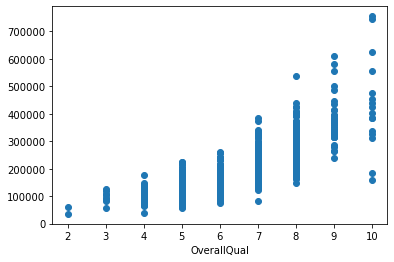

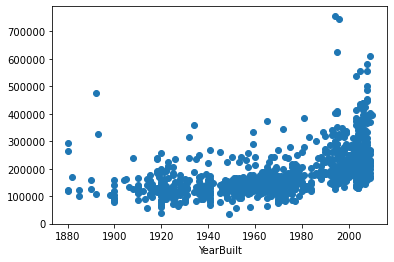

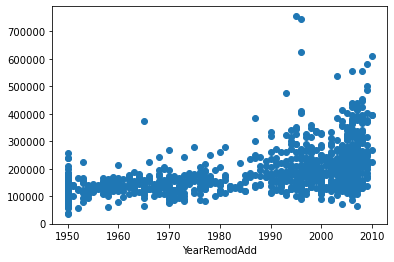

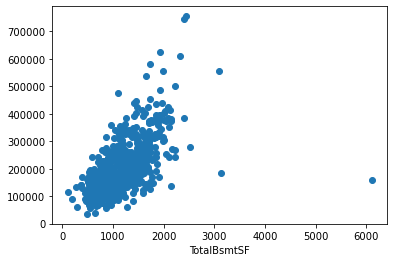

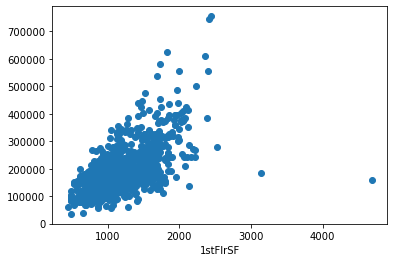

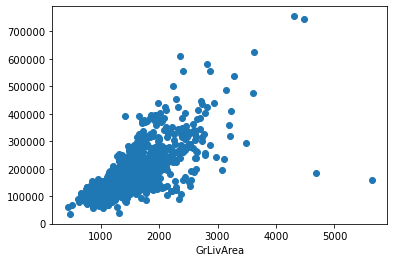

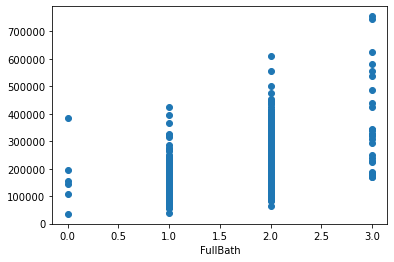

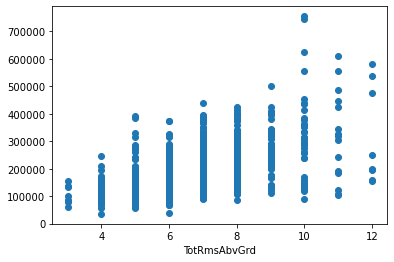

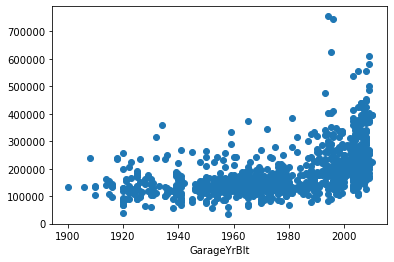

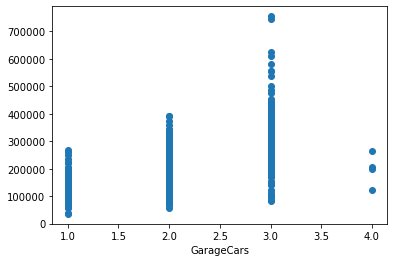

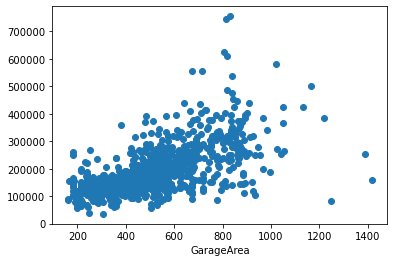

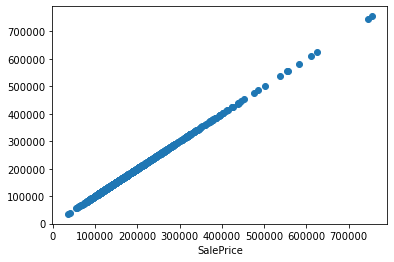

In [55]:
for i in Houses3:
    plt.figure()
    plt.scatter(Houses[i], Houses['SalePrice'])
    plt.xlabel(i)
plt.show()

In [56]:
Houses3['SalePrice'] = Houses3['SalePrice']  / Houses3['SalePrice'].abs().max()

In [57]:
X = Houses3[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']]
Y = Houses3[['SalePrice']]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [59]:
clf = LinearRegression()

In [60]:
clf.fit(x_train, y_train)

LinearRegression()

In [61]:
ypred = clf.predict(x_test)

In [62]:
clf.score(x_test, y_test)

0.7940122405191312

In [63]:
clf.score(x_train, y_train)

0.7462170341843178

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.033395907927879685
Mean Squared Error: 0.0025292165254677374
Root Mean Squared Error: 0.05029131660105686


In [65]:
metrics.r2_score(y_test, ypred)

0.7940122405191312

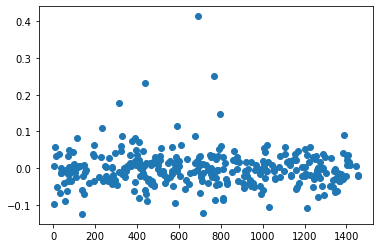

In [66]:
g=plt.plot(y_test - ypred,marker='o',linestyle='')

(0.06511726095701385,
 1.1389132899223486,
 0.046185814113870224,
 1.119981843079205)

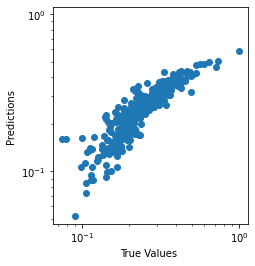

In [67]:
g=plt.scatter(y_test, ypred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

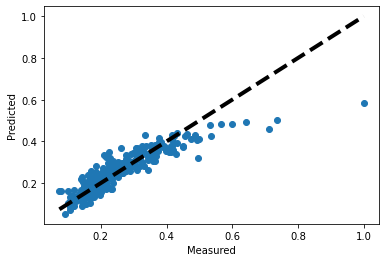

In [68]:
fig, ax = plt.subplots()
ax.scatter(y_test, ypred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Now I will utilize different categorical variables and alter them to numiric in order to apply linear regression over and find out if we can enhance our model further if we added additional info. Finally, it should be noted that only categorical variables that has between 2 to 5 unique values under them will be used. More than that will slow the processing and may cause our model to be over fitting**

In [70]:
df = Houses.copy()

I will drop all catigoricol varaibles that has more that five unique values

In [71]:
List

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [75]:
L = List.copy()

In [77]:
L.remove('Utilities')

In [79]:
for i in L:
    if Houses[i].nunique() > 5:
        df.drop([i] , axis='columns', inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  BldgType       1094 non-null   object 
 11  OverallQual    1094 non-null   int64  
 12  OverallCond    1094 non-null   int64  
 13  YearBuilt      1094 non-null   int64  
 14  YearRemodAdd   1094 non-null   int64  
 15  RoofStyle      1094 non-null   object 
 16  MasVnrType     1094 non-null   object 
 17  MasVnrArea     1094 non-null   float64
 18  ExterQua

In [81]:
df['SalePrice'] = df['SalePrice']  / df['SalePrice'].abs().max()

In [82]:
df.drop(['Id'] , axis='columns', inplace=True) #dropping Id column since it has no use

I will drop again all numiric columns that has low correlation value with the house's price

In [83]:
for i in List3:
    df.drop([i] , axis='columns', inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1094 non-null   object 
 1   Street        1094 non-null   object 
 2   LotShape      1094 non-null   object 
 3   LandContour   1094 non-null   object 
 4   LotConfig     1094 non-null   object 
 5   LandSlope     1094 non-null   object 
 6   BldgType      1094 non-null   object 
 7   OverallQual   1094 non-null   int64  
 8   YearBuilt     1094 non-null   int64  
 9   YearRemodAdd  1094 non-null   int64  
 10  RoofStyle     1094 non-null   object 
 11  MasVnrType    1094 non-null   object 
 12  ExterQual     1094 non-null   object 
 13  ExterCond     1094 non-null   object 
 14  Foundation    1094 non-null   object 
 15  BsmtQual      1094 non-null   object 
 16  BsmtCond      1094 non-null   object 
 17  BsmtExposure  1094 non-null   object 
 18  TotalBsmtSF   1094 non-null 

Now I will create a loop that will run the linear regression model for all numiric varaible in additon to one categorical variable that will be transferred to dummy variable first

In [87]:
!pip install category_encoders
import category_encoders as ce

*Testing one hot encoder function*

In [117]:
L2 = []
for i in L:
    if Houses[i].nunique() < 5:
        L2.append(i)

In [118]:
L2

['Street',
 'LotShape',
 'LandContour',
 'LandSlope',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive']

In [88]:
df1 = df.copy()

In [136]:
encoder = ce.OneHotEncoder(use_cat_names=True, cols='LotShape')
df_encoded = encoder.fit_transform(df1)
df_encoded.head()

C:\Users\feras\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,MSZoning,Street,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour,LotConfig,LandSlope,BldgType,...,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SalePrice
0,RL,Pave,1,0,0,0,Lvl,Inside,Gtl,1Fam,...,Gd,8,2003.0,RFn,2,548,TA,TA,Y,0.276159
1,RL,Pave,1,0,0,0,Lvl,FR2,Gtl,1Fam,...,TA,6,1976.0,RFn,2,460,TA,TA,Y,0.240397
2,RL,Pave,0,1,0,0,Lvl,Inside,Gtl,1Fam,...,Gd,6,2001.0,RFn,2,608,TA,TA,Y,0.296026
3,RL,Pave,0,1,0,0,Lvl,Corner,Gtl,1Fam,...,Gd,7,1998.0,Unf,3,642,TA,TA,Y,0.185430
4,RL,Pave,0,1,0,0,Lvl,FR2,Gtl,1Fam,...,Gd,9,2000.0,RFn,3,836,TA,TA,Y,0.331126


*Done testing the function and will be utilized next*

In [168]:
for i in L2:
    model = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', i, 'SalePrice']]
    encoder = ce.OneHotEncoder(use_cat_names=True, cols=i)
    df_encoded = encoder.fit_transform(model)
    list_of_features = []
    for j in range(len(df_encoded.columns)):
        if j != (len(df_encoded.columns) - 1):
            list_of_features.append(df_encoded.columns[j])
    X = df_encoded[list_of_features]
    Y = df_encoded[['SalePrice']]
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    clf.fit(x_train, y_train)
    ypred = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    print('When adding the categorical variably: ', i,'==>', 'The score will be: ', score)

When adding the categorical variably:  Street ==> The score will be:  0.7944043503144591
When adding the categorical variably:  LotShape ==> The score will be:  0.7650077155308972
When adding the categorical variably:  LandContour ==> The score will be:  0.8025836472220759
When adding the categorical variably:  LandSlope ==> The score will be:  0.7967633262327638
When adding the categorical variably:  MasVnrType ==> The score will be:  0.795678696275012
When adding the categorical variably:  ExterQual ==> The score will be:  0.8183126022279816
When adding the categorical variably:  ExterCond ==> The score will be:  0.7942937669787796
When adding the categorical variably:  BsmtQual ==> The score will be:  0.8069260380214416
When adding the categorical variably:  BsmtCond ==> The score will be:  0.7953344332762485
When adding the categorical variably:  BsmtExposure ==> The score will be:  0.8065154911928096
When adding the categorical variably:  Heating ==> The score will be:  0.79213586

### From the above it can be seen that the maximum R square scoring is 0.818 when the feature ExterQual or "Exterior material quality" is added